# AFAME TECHNOLOGIES  

### PROJECT-2 : TITANIC PREDICTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### LOAD THE DATASET

In [2]:
#open the csv file
df=pd.read_csv('Intern Datasets/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### DATA EXPLORATION AND VISUALIZATION

In [4]:
#Size of the table
df.shape

(891, 12)

In [5]:
#value counts of the table
df.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

In [6]:
#Describe the table
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Datatypes of each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
#Dimension of the table
df.ndim

2

In [9]:
#information of the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### DATA CLEANING :

In [10]:
#check for the missing values 
print(df.isnull(),df.sum())

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

C:\Users\renga\AppData\Local\Temp\ipykernel_18600\4280943430.py:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.isnull(),df.sum())


In [11]:
missing_values = df.isna().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

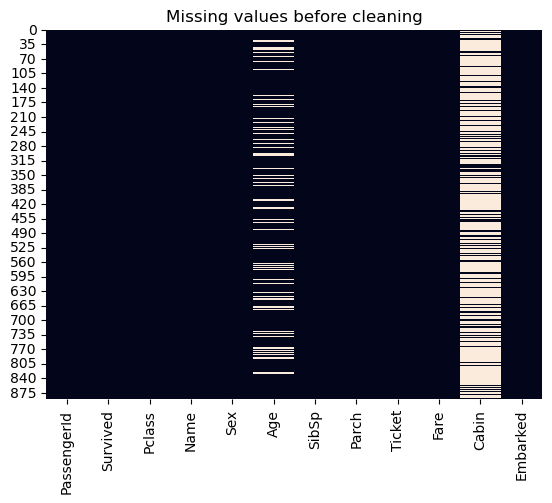

In [13]:
sns.heatmap(df.isnull(),cbar=False)
plt.title('Missing values before cleaning')
plt.show()

In [14]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

In [15]:
# Drop unnecessary columns
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Display the first few rows of the preprocessed dataset
print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


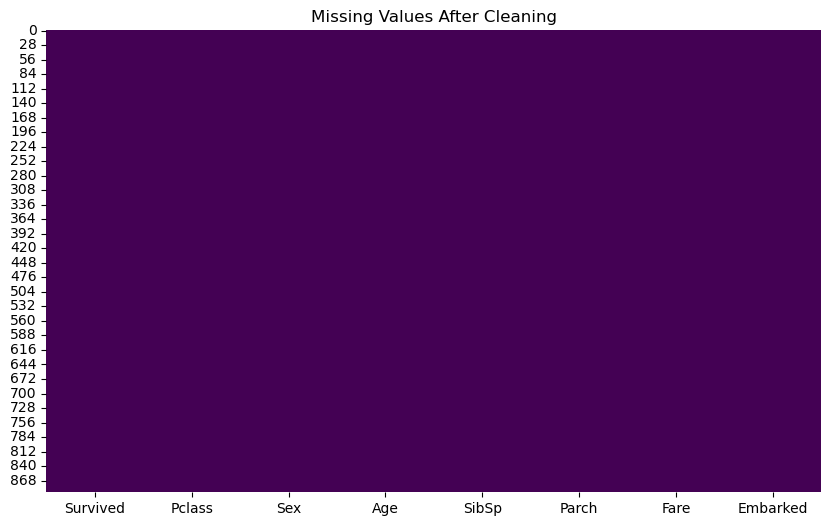

In [16]:
# Visualize missing values after cleaning
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values After Cleaning')
plt.show()

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


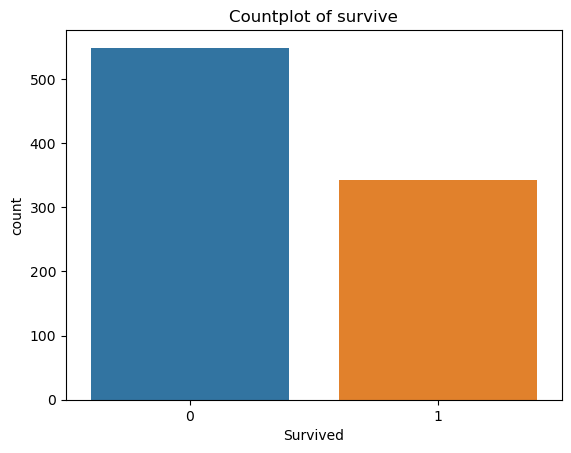

In [18]:
# Countplot of survival
sns.countplot(x='Survived', data=df)
plt.title('Countplot of survive')
plt.show()

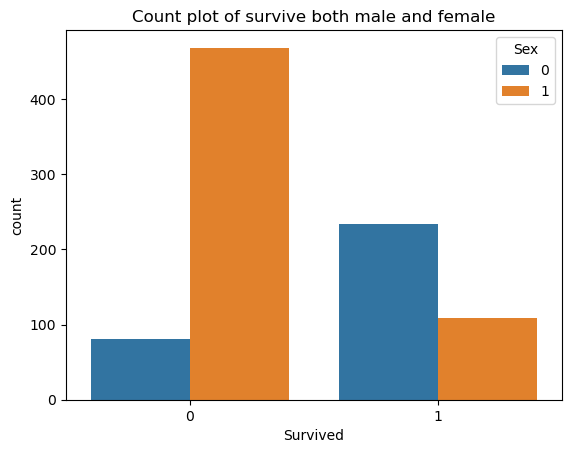

In [19]:
# Countplot of survival by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Count plot of survive both male and female')
plt.show()

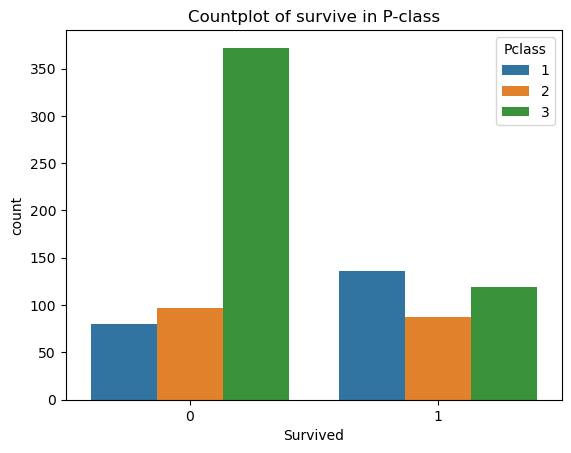

In [20]:
# Countplot of survival by class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Countplot of survive in P-class')
plt.show()

In [21]:
# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

### SPLIT THE DATASET INTO TRAINING AND TESTING SETS

In [22]:
# Split the data into features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### FEATURE SCALING

In [23]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train
X_test

array([[ 0.81303367,  0.7243102 , -0.09263364, ...,  0.78470001,
        -0.33390078, -2.02505292],
       [-0.40055118,  0.7243102 ,  0.13815631, ..., -0.47934164,
        -0.42528387,  0.5635246 ],
       [ 0.81303367,  0.7243102 , -0.7080735 , ..., -0.47934164,
        -0.47486697,  0.5635246 ],
       ...,
       [ 0.81303367, -1.38062393,  0.67666619, ...,  5.8408666 ,
        -0.02308312,  0.5635246 ],
       [-0.40055118, -1.38062393, -0.93886345, ..., -0.47934164,
        -0.42528387,  0.5635246 ],
       [ 0.81303367, -1.38062393, -1.93895323, ...,  0.78470001,
        -0.30589933,  0.5635246 ]])

### TRAIN A RANDOM FOREST CLASSIFIER

In [24]:
# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

### EVALUATE THE MODEL 

In [25]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8212290502793296
Confusion Matrix:
[[92 13]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



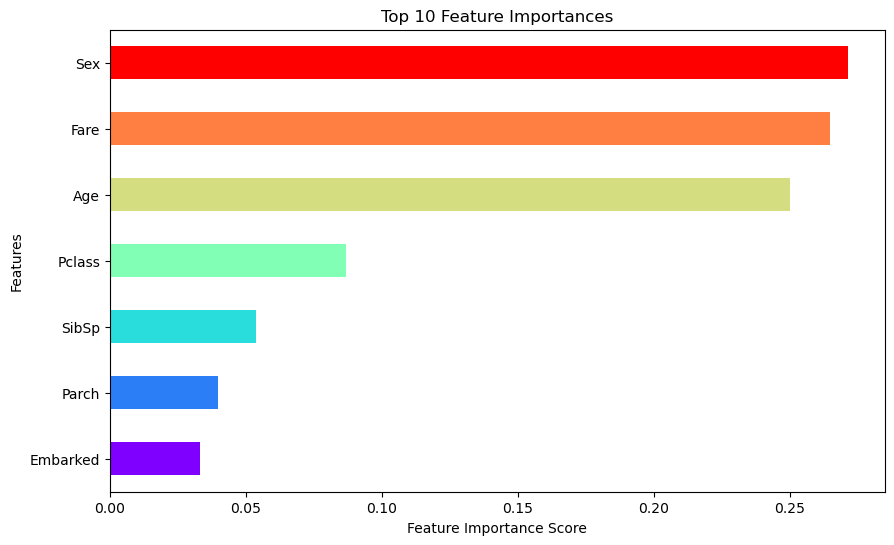

In [26]:
# Create a rainbow plot for feature importances
# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
cmap = plt.get_cmap('rainbow')
colors = cmap(np.linspace(0, 1, len(feature_importances)))

# Plot feature importances with rainbow colors
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).sort_values().plot(kind='barh', color=colors)
plt.title('Top 10 Feature Importances')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

### CORRELATION ANALYSIS

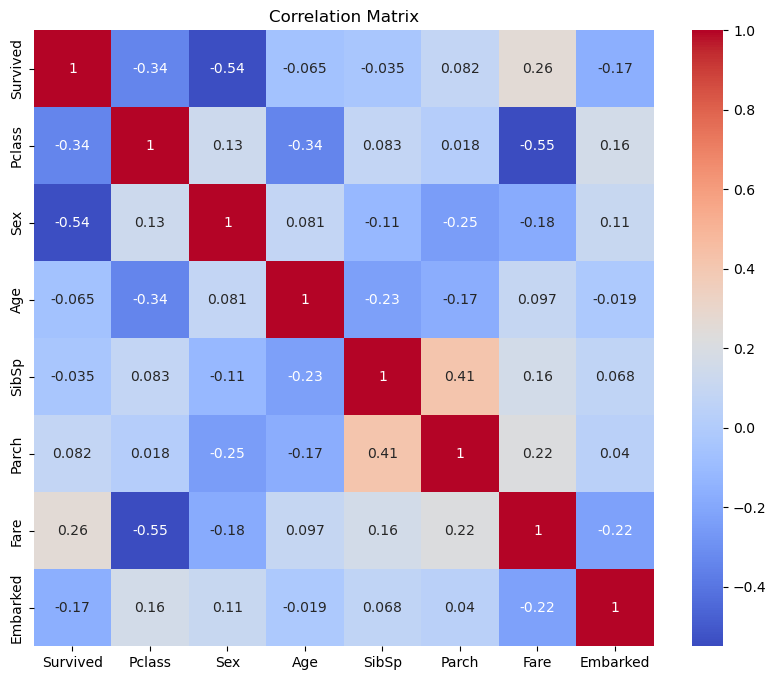

In [27]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### SURVIVAL RATE ANALYSIS

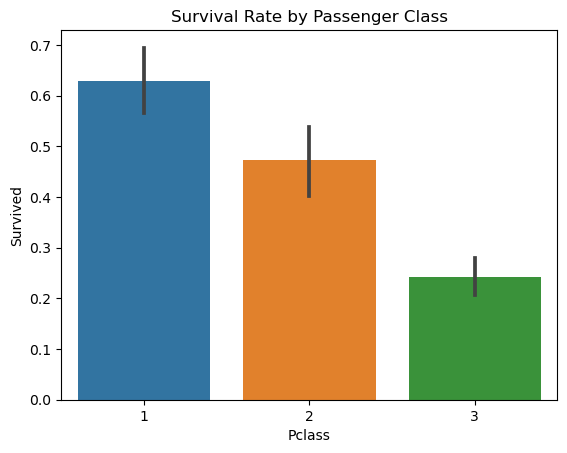

In [28]:
# Survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

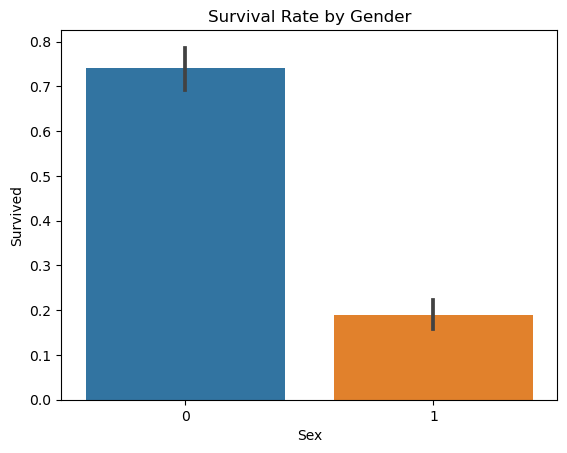

In [29]:
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

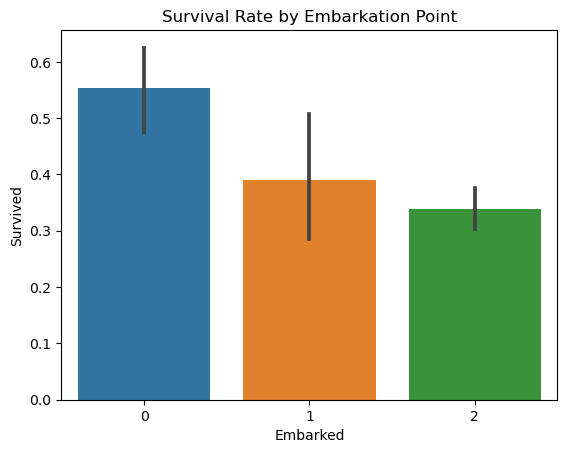

In [30]:
# Survival rate by embarkation point
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarkation Point')
plt.show()

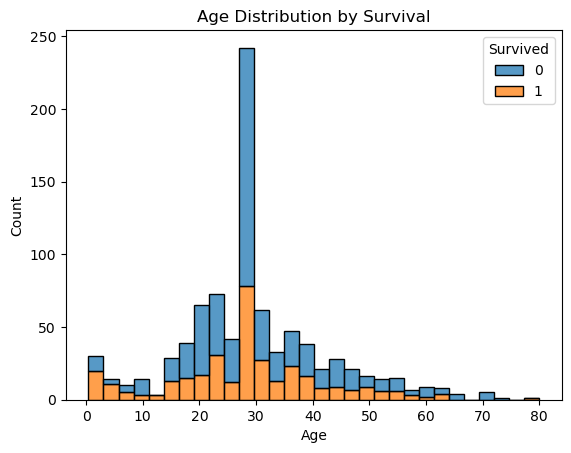

In [31]:
# Age distribution by survival
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title('Age Distribution by Survival')
plt.show()

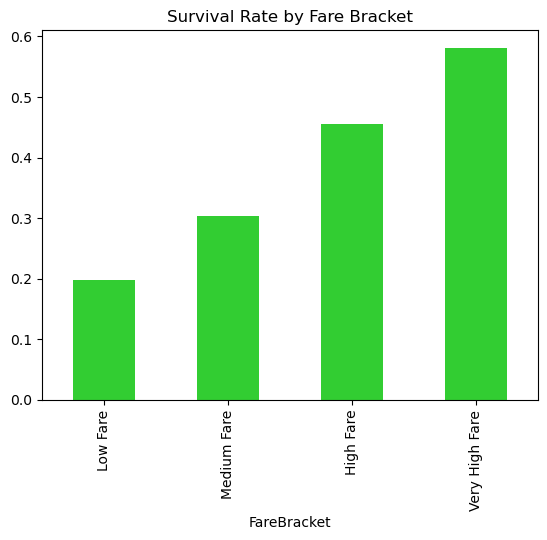

In [32]:
# Survival rate by fare bracket
df['FareBracket'] = pd.qcut(df['Fare'], 4, labels=['Low Fare', 'Medium Fare', 'High Fare', 'Very High Fare'])
fare_bracket_survival = df.groupby('FareBracket')['Survived'].mean().plot(kind='bar', color='limegreen', title='Survival Rate by Fare Bracket')
plt.show()

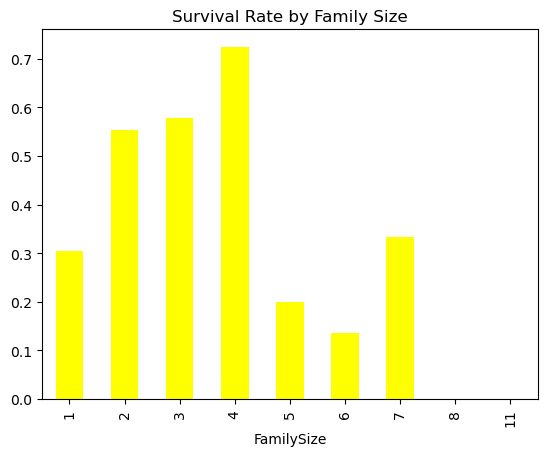

In [33]:
# Survival rate by family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
family_size_survival = df.groupby('FamilySize')['Survived'].mean().plot(kind='bar', color='yellow', title='Survival Rate by Family Size')
plt.show()

### Age vs Fare

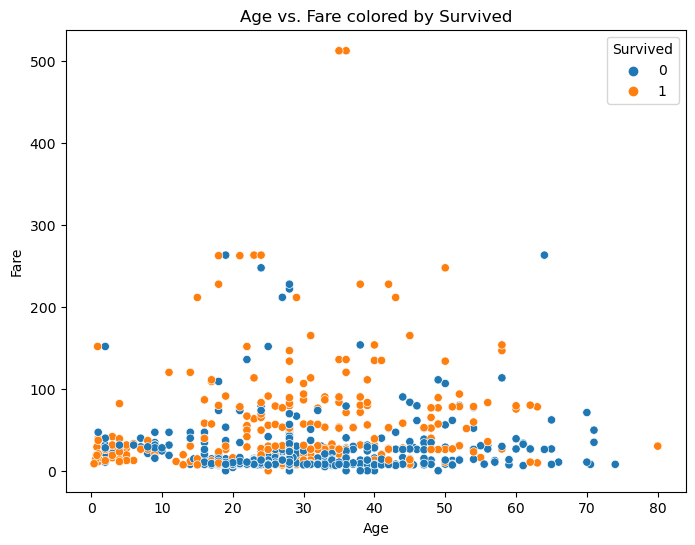

In [37]:
# Scatter Plot: Age vs. Fare colored by Survived
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title('Age vs. Fare colored by Survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

### PAIR RELATIONSHIPS:

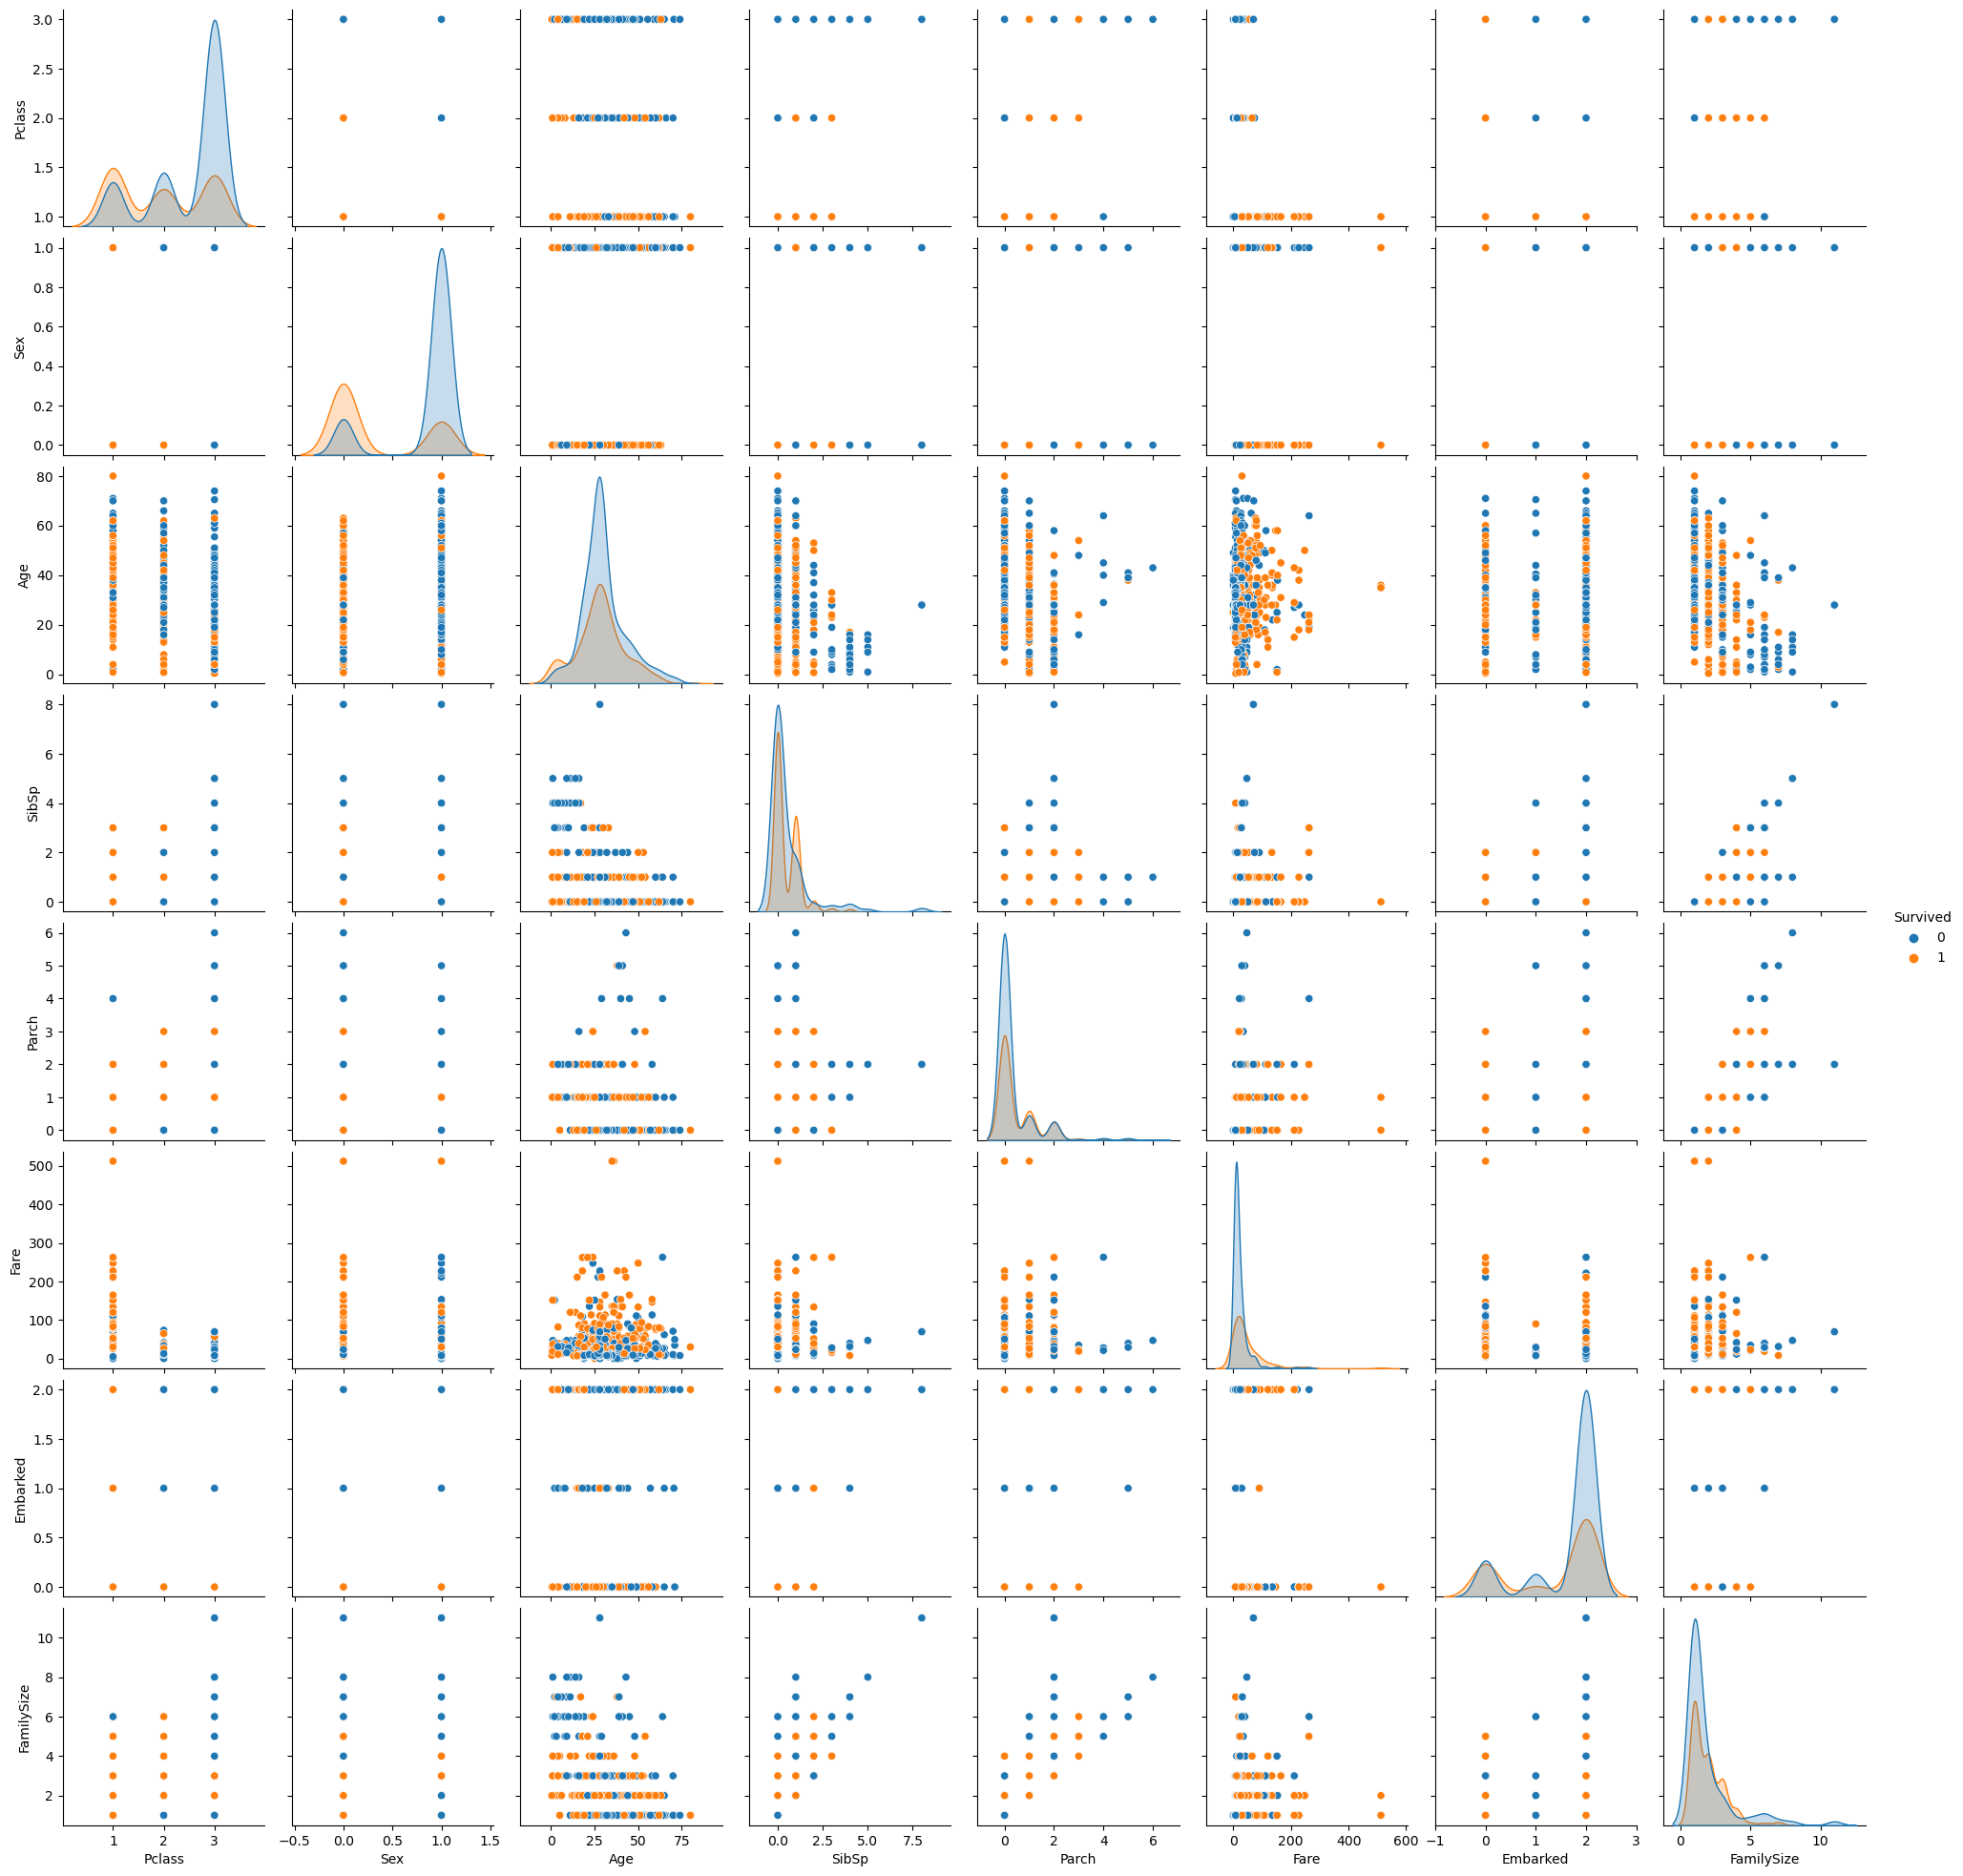

In [38]:
# Pair Plot: Pairwise Relationships
sns.pairplot(df, hue='Survived')
plt.show()

### CONCLUSION ANALYSIS 

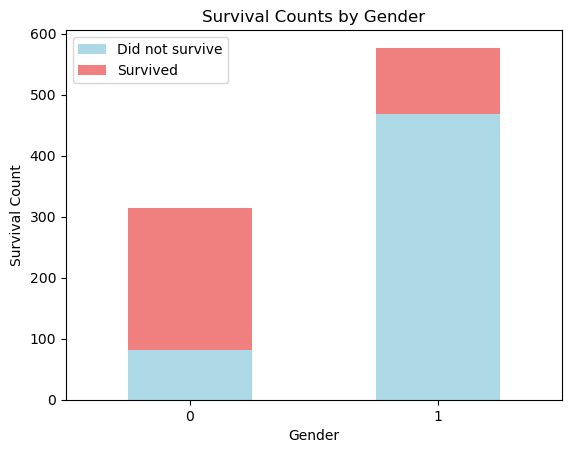

In [41]:
# Gender analysis
gender_survival = df.groupby('Sex')['Survived'].value_counts().unstack()
gender_survival.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'])
plt.title('Survival Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Count')
plt.xticks(rotation=0)
plt.legend(['Did not survive', 'Survived'])
plt.show()

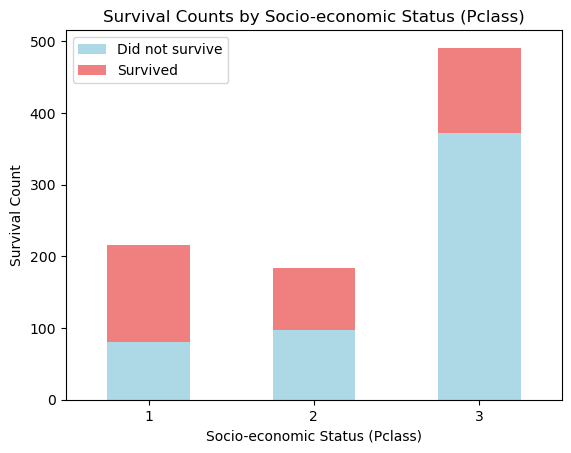

In [42]:
# Socio-economic status (Pclass) analysis
pclass_survival = df.groupby('Pclass')['Survived'].value_counts().unstack()
pclass_survival.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'])
plt.title('Survival Counts by Socio-economic Status (Pclass)')
plt.xlabel('Socio-economic Status (Pclass)')
plt.ylabel('Survival Count')
plt.xticks(rotation=0)
plt.legend(['Did not survive', 'Survived'])
plt.show()

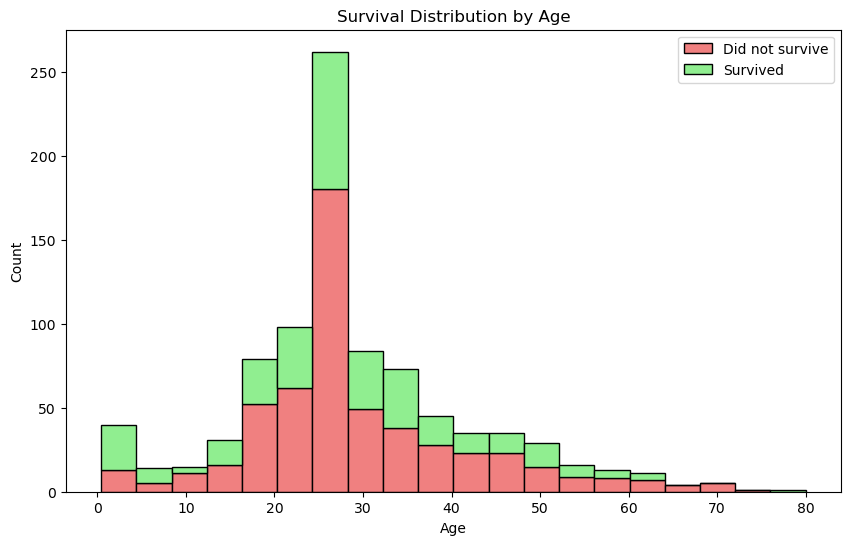

In [45]:
# Age analysis (assuming 'Age' column exists in the dataset)
plt.figure(figsize=(10, 6))
plt.hist([df[df['Survived'] == 0]['Age'], df[df['Survived'] == 1]['Age']], 
         color=['lightcoral', 'lightgreen'], bins=20, edgecolor='black', stacked=True)
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()